# Practical example

## Importing the relevant libraries

In [250]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [251]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985,520
4343,Toyota,14200.00,sedan,31,NaN,Petrol,yes,2014,Corolla


## Preprocessing

### Exploring the descriptive statistics of the variables

In [252]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Determining the variables of interest

In [253]:
data = raw_data.drop('Model', axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Dealing with missing values

In [254]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [255]:
data_no_mv = data.dropna(axis=0)

In [256]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Exploring the PDFs

### Dealing with outliers

In [257]:
q = data_no_mv['Price'].quantile(0.90)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3622,3622.00,3622,3622.00,3622.00,3622,3622,3622.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,850,NaN,1444,NaN,NaN,1608,3251,NaN
mean,NaN,12951.08,NaN,177.02,2.69,NaN,NaN,2005.55
std,NaN,9028.27,NaN,97.24,5.18,NaN,NaN,6.51
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6500.00,NaN,110.00,1.80,NaN,NaN,2002.00
50%,NaN,10400.00,NaN,170.00,2.00,NaN,NaN,2007.00
75%,NaN,17500.00,NaN,240.00,2.80,NaN,NaN,2011.00


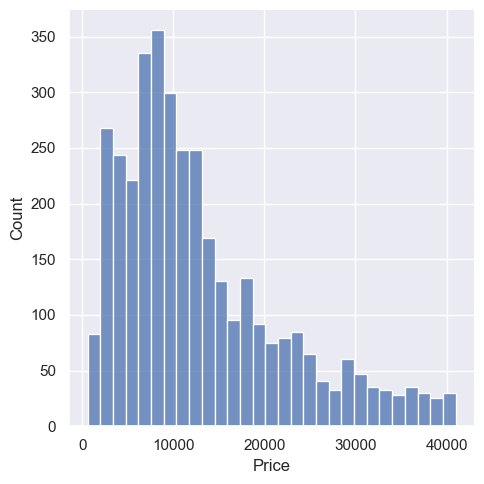

In [258]:
sns.displot(data_1['Price'])

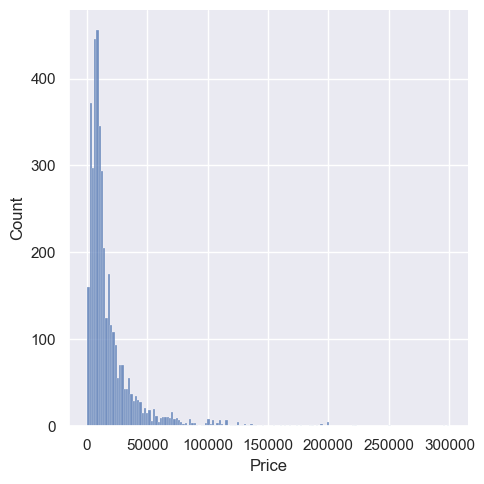

In [259]:
sns.displot(data_no_mv['Price'])

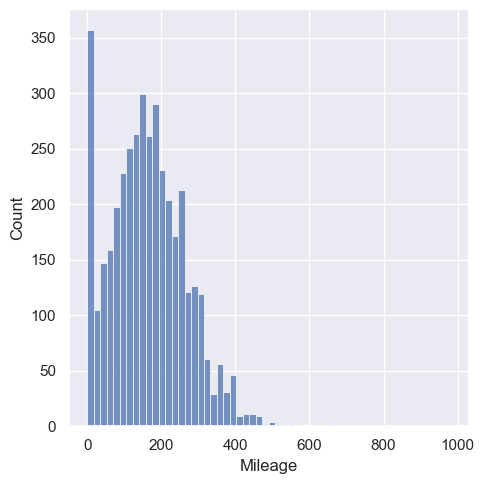

In [260]:
sns.displot(data_no_mv['Mileage'])

In [261]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

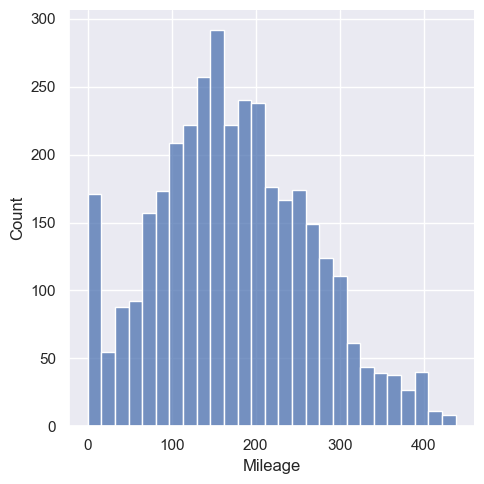

In [262]:
sns.displot(data_2['Mileage'])

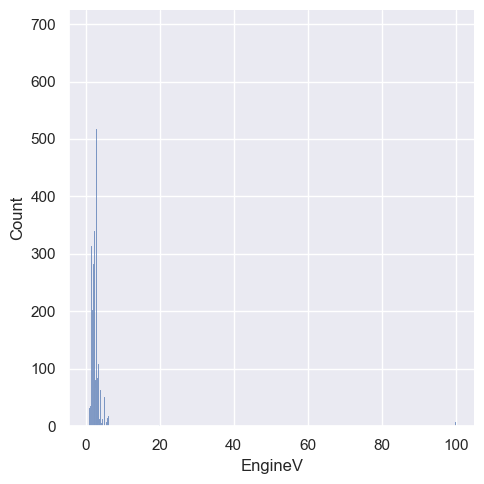

In [263]:
sns.displot(data_no_mv['EngineV'])

In [264]:
data_3 = data_2[data_2['EngineV']<6]

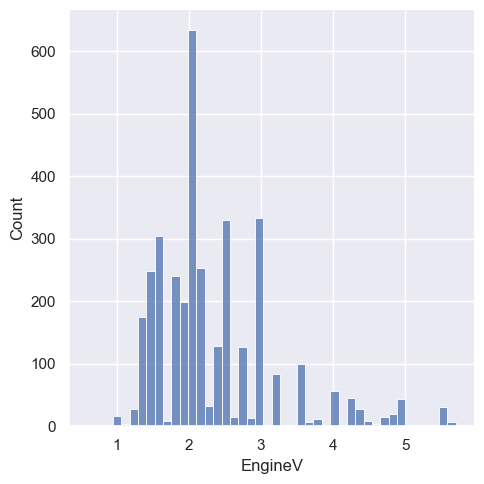

In [265]:
sns.displot(data_3['EngineV'])

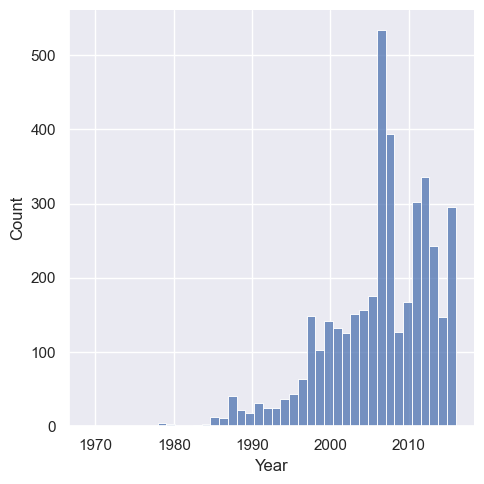

In [266]:
sns.displot(data_no_mv['Year'])

In [267]:
q = data_3['Year'].quantile(0.05)
data_4 = data_3[data_3['Year']>q]

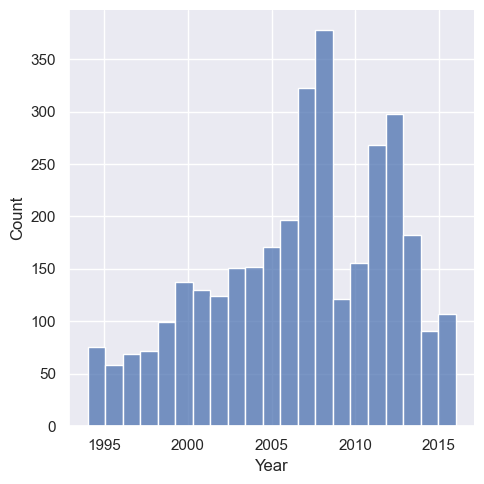

In [268]:
sns.displot(data_4['Year'])

In [269]:
data_cleaned = data_4.reset_index(drop=True)

In [270]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3361,3361.00,3361,3361.00,3361.00,3361,3361,3361.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,781,NaN,1288,NaN,NaN,1537,3005,NaN
mean,NaN,13536.17,NaN,169.26,2.36,NaN,NaN,2006.59
std,NaN,8925.77,NaN,87.75,0.87,NaN,NaN,5.16
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1994.00
25%,NaN,7200.00,NaN,108.00,1.80,NaN,NaN,2003.00
50%,NaN,10900.00,NaN,165.00,2.00,NaN,NaN,2007.00
75%,NaN,17977.00,NaN,230.00,2.80,NaN,NaN,2011.00


## Checking the OLS assumptions

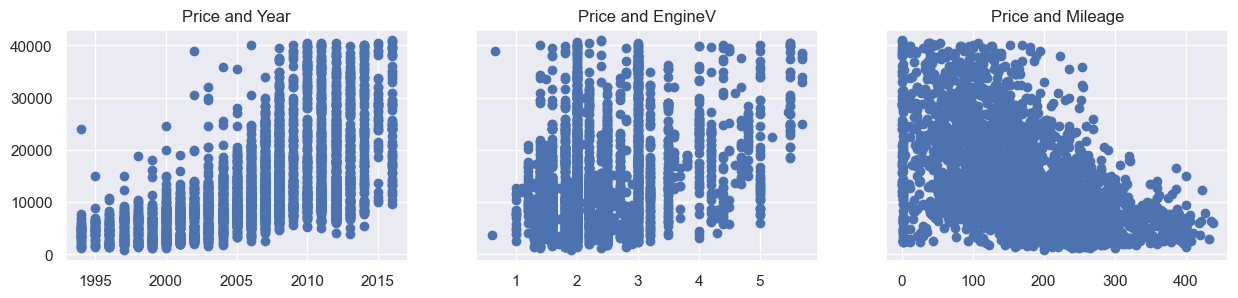

In [271]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

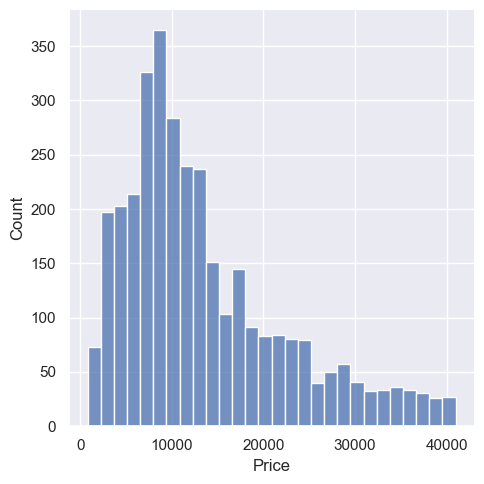

In [272]:
sns.displot(data_cleaned['Price'])

### Relaxing the assumptions

In [273]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
1,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
2,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
3,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
4,BMW,6100.00,sedan,438,2.00,Gas,yes,1997,8.72
...,...,...,...,...,...,...,...,...,...
3356,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007,8.82
3357,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3358,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3359,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


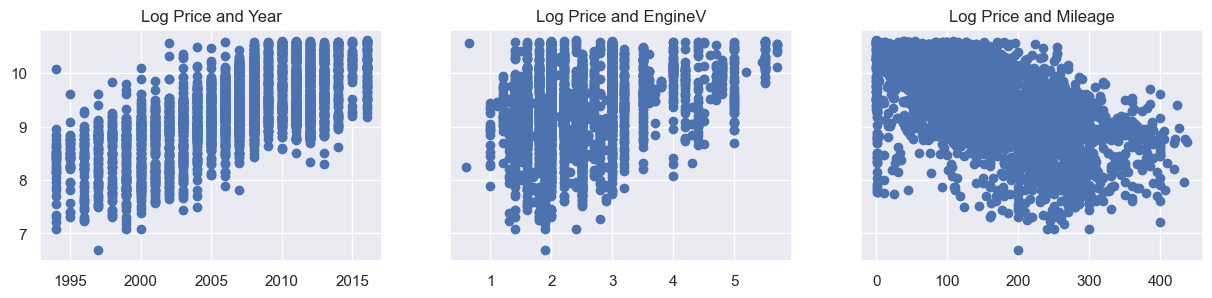

In [274]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [275]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [276]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [277]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [278]:
vif

,VIF,features
0,4.80,Mileage
1,10.71,Year
2,8.57,EngineV


In [279]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [280]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [281]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,438,2.00,8.72,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1


### Rearrange a bit

In [282]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [283]:
data_preprocessed = data_with_dummies
data_preprocessed.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,438,2.00,8.72,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1


## Linear regression model

### Declare the inputs and the targets

In [284]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [285]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [286]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [287]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [288]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [289]:
y_hat = reg.predict(x_train)

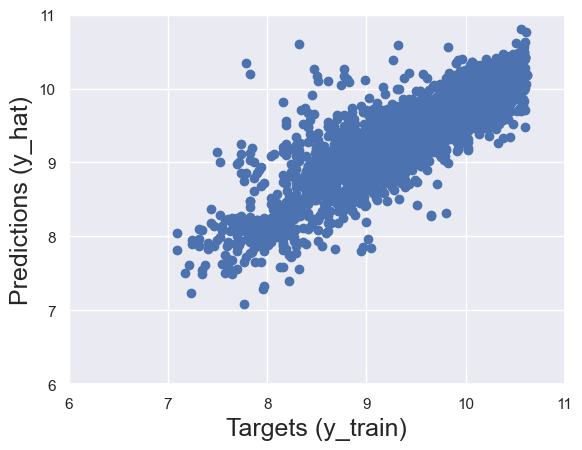

In [307]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,11)
plt.ylim(6,11)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

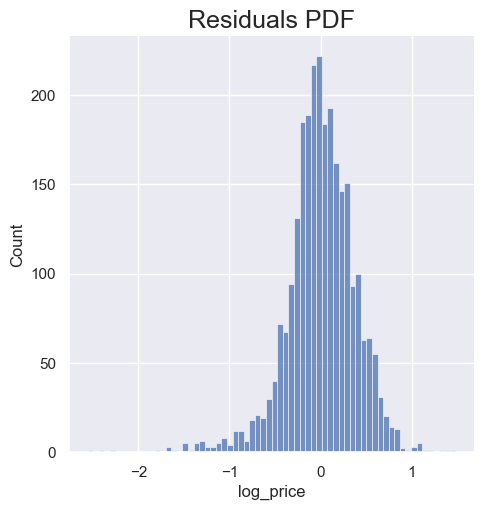

In [291]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [292]:
reg.score(x_train,y_train)

0.7012022244494929

### Finding the weights and bias

In [293]:
reg.intercept_

9.289240900321044

In [294]:
reg.coef_

array([-0.32399745,  0.15744234, -0.00512469, -0.02042347, -0.13372052,
       -0.17862325, -0.04920604, -0.08125726, -0.13642831, -0.08519668,
       -0.1799445 , -0.11767514, -0.16836791, -0.08951524, -0.0203344 ,
       -0.10161189,  0.33927581])

In [295]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.32
1,EngineV,0.16
2,Brand_BMW,-0.01
3,Brand_Mercedes-Benz,-0.02
4,Brand_Mitsubishi,-0.13
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.05
7,Brand_Volkswagen,-0.08
8,Body_hatch,-0.14
9,Body_other,-0.09


In [296]:
data_cleaned['Brand'].unique()

array(['Mercedes-Benz', 'Audi', 'Toyota', 'BMW', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [297]:
y_hat_test = reg.predict(x_test)

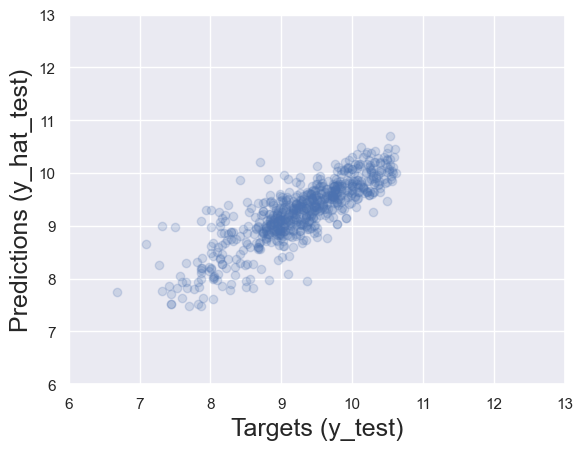

In [298]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [299]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,15993.74
1,18810.96
2,12493.64
3,6875.23
4,20683.13


In [300]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,15993.74,NaN
1,18810.96,13300.00
2,12493.64,NaN
3,6875.23,NaN
4,20683.13,NaN
5,3719.15,14200.00
6,15150.80,NaN
7,9474.96,NaN
8,14795.50,11950.00
9,9695.03,NaN


In [301]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    9.56
1   10.04
2    8.75
3    9.08
4   10.55
Name: log_price, dtype: float64

In [302]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,15993.74,14250.00
1,18810.96,22900.00
2,12493.64,6300.00
3,6875.23,8800.00
4,20683.13,38000.00
5,3719.15,4200.00
6,15150.80,11999.00
7,9474.96,20300.00
8,14795.50,8000.00
9,9695.03,11500.00


In [303]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [304]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,15993.74,14250.00,-1743.74,12.24
1,18810.96,22900.00,4089.04,17.86
2,12493.64,6300.00,-6193.64,98.31
3,6875.23,8800.00,1924.77,21.87
4,20683.13,38000.00,17316.87,45.57
5,3719.15,4200.00,480.85,11.45
6,15150.80,11999.00,-3151.80,26.27
7,9474.96,20300.00,10825.04,53.33
8,14795.50,8000.00,-6795.50,84.94
9,9695.03,11500.00,1804.97,15.70


In [305]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,673.00,673.00,673.00,673.00
mean,12342.77,13332.89,990.12,32.62
std,6655.86,8825.83,5146.05,44.38
min,1761.37,800.00,-20902.07,0.12
25%,7692.87,7199.00,-1856.18,10.61
50%,11159.27,10900.00,109.30,21.65
75%,15586.21,17777.00,2945.14,37.72
max,44421.14,40755.00,22968.74,440.24


In [306]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
241,4305.27,4300.00,-5.27,0.12
349,2553.92,2550.00,-3.92,0.15
519,7713.68,7700.00,-13.68,0.18
42,3155.90,3150.00,-5.90,0.19
328,11454.86,11500.00,45.14,0.39
296,6467.82,6500.00,32.18,0.50
425,17711.66,17800.00,88.34,0.50
535,3083.52,3100.00,16.48,0.53
397,17091.45,16999.00,-92.45,0.54
293,17091.45,17191.20,99.75,0.58
